<a href="https://colab.research.google.com/github/AnaClarice382/data_science_analysis/blob/master/Challenger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Regressão logística binária

 A regressão logistica é uma técnica estatistica para estimar a probabilidade de um evento ocorrer ou não.

A probabilidade de ocorrência do evento é calculada por:

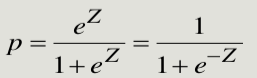

onde Z é igual a soma do alpha (intercept) e os betas 

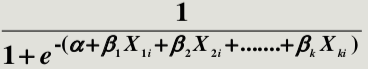

Os parametros são estimados a partir do método de Máxima Verossimilhança

## Problema

Vamos analisar os dados de testes do voo Challenger, e estimar quais eram as chances de ocorrer falha no dia do lançamento.

### Hipoteses

*   Será que a temperatura no dia do teste tem relação com a quantidade de desgastes?
*   Será que a pressão tem relação com a quantidade de desgastes?

### R

In [423]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [424]:
%%R
load("challenger.RData", verbose=T) #verbose é para verificar com qual nome ele carregou

Loading objects:
  challenger


In [425]:
%%R
ls()
challenger_to_csv <- challenger #recupero o dataframe que foi carregado

In [426]:
%%R
write.csv(challenger_to_csv,"/content/challenger.csv", row.names = T) #escrevo ele como csv

### Python

In [427]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from statsmodels.base.model import GenericLikelihoodModel
from statsmodels.discrete.discrete_model import Logit

In [428]:
df_challenger = pd.read_csv('/content/challenger.csv')

Dicionario dos dados

| Coluna | Descrição |
| ------ | --------- |
| desgate | Quantidade de vezes que ocorreu stress térmico | 
| temperatura| Temperatura em °F|
| pressão| Pressão de verificação de vazamento |
| t | id do teste de lançamento |



In [429]:
df_challenger

,Unnamed: 0,desgaste,temperatura,pressão,t
0,1,0,66,50,1
1,2,1,70,50,2
2,3,0,69,50,3
3,4,0,68,50,4
4,5,0,67,50,5
5,6,0,72,50,6
6,7,0,73,100,7
7,8,0,70,100,8
8,9,1,57,200,9
9,10,1,63,200,10


In [430]:
df_challenger.describe()

,Unnamed: 0,desgaste,temperatura,pressão,t
count,23.00000,23.000000,23.000000,23.000000,23.00000
mean,12.00000,0.304348,69.565217,152.173913,12.00000
std,6.78233,0.558796,7.057080,68.221332,6.78233
min,1.00000,0.000000,53.000000,50.000000,1.00000
25%,6.50000,0.000000,67.000000,75.000000,6.50000
50%,12.00000,0.000000,70.000000,200.000000,12.00000
75%,17.50000,0.500000,75.000000,200.000000,17.50000
max,23.00000,2.000000,81.000000,200.000000,23.00000


In [431]:
df_challenger = df_challenger.drop(columns='Unnamed: 0')

In [432]:
df_challenger.rename(columns={'pressão':'pressao'}, 
                     inplace=True)

In [433]:
def create_dependent_variable(df : pd.core.frame.DataFrame) -> pd.core.frame.DataFrame:
  df.loc[df['desgaste'] >= 1, 'falha'] = int(1)
  df.loc[df['desgaste'] == 0, 'falha'] = int(0)

In [434]:
create_dependent_variable(df_challenger)

In [435]:
import plotly.express as px


fig = px.scatter(df_challenger, y="falha", x="temperatura", color="temperatura")
fig.update_traces(marker_size=10)
fig.show()

In [436]:
logit = Logit.from_formula('falha ~ temperatura + pressao',data=df_challenger).fit()

Optimization terminated successfully.
         Current function value: 0.305063
         Iterations 8


### Analisando a significancia dos parametros

Abaixo podemos pressão não passou no teste z, ou seja, não se mostrou significante. Vamos tentar estimar nosso modelo sem a variavel pressão e comparar.

### AIC e BIC 
Vamos usar AIC e BIC como referencia para verificar qual modelo seria melhor, com ou sem a variavel pressão.

Tanto o AIC (Akaike Information Criterion) quanto o BIC (Bayesian Information Criterion) são métodos para mensurar a qualidade do modelo, com a diferença que o BIC penaliza mais pela complexidade. Em ambos, quanto menor, melhor.

AIC é dado por `-2/N * LL + 2 * k/N` 

BIC é dado por `-2 * LL + log(N) * k`

onde **N** é a quantidade de amostras, **LL** é o log-likelihood do modelo e **k** é a quantidade de parametros (incluindo o alpha). 


In [437]:
logit.summary2() 

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Pseudo R-squared: 0.468    
Dependent Variable: falha            AIC:              20.0329  
Date:               2021-09-06 19:48 BIC:              23.4394  
No. Observations:   23               Log-Likelihood:   -7.0164  
Df Model:           2                LL-Null:          -13.201  
Df Residuals:       20               LLR p-value:      0.0020606
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     8.0000                                      
-----------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-----------------------------------------------------------------
Intercept    21.8436   11.9365   1.8300  0.0673  -1.5514  45.2387
temperatura  -0.3501    0.1730  -2.0239  0.0430  -0.6891  -0.0111
pressao       0.0060    0.0097   0.6161  0.5378  -0.0131   0.0251
================================================================

"""

In [438]:
logit_sem_pressao = Logit.from_formula('falha ~ temperatura',data=df_challenger).fit()
logit_sem_pressao.summary2()

Optimization terminated successfully.
         Current function value: 0.313604
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.454     
Dependent Variable: falha            AIC:              18.4258   
Date:               2021-09-06 19:48 BIC:              20.6968   
No. Observations:   23               Log-Likelihood:   -7.2129   
Df Model:           1                LL-Null:          -13.201   
Df Residuals:       21               LLR p-value:      0.00053874
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     23.7750   11.8204   2.0113  0.0443   0.6074  46.9425
temperatura   -0.3667    0.1752  -2.0934  0.0363  -0.7100  -0.0234
=================================================================

"""

Vou dar uma extrapoladinha no predict, só para entendermos o quanto a baixa temperatura influencia na nossa variavel y. No dia do lançamento da challenger, estava ~36 °F, uma temperatura em que o Challenger nunca havia sido testado. Claro que já existia um alarme sobre a temperatura daquele dia, e foi completamente ignorada. 

Bom, para a temperatura de 36°F, havia uma probabilidade de 0.999974 de ocorrer falha no voo

In [439]:
# Create the pandas DataFrame to predict 

data = [[36,200], [53,50], [81,100]]
df = pd.DataFrame(data, columns = ['temperatura','pressao'])
df

,temperatura,pressao
0,36,200
1,53,50
2,81,100


In [440]:
#Modelo sem considerar a variavel pressao
logit_sem_pressao.predict(exog=df['temperatura'])

0    0.999974
1    0.987129
2    0.002657
dtype: float64

In [441]:
#Considerando a variavel pressao
logit.predict(exog=df[['temperatura','pressao']])

0    0.999971
1    0.973111
2    0.002695
dtype: float64

### Conclusões

A variavel temperatura era mesmo estatisticamente significante para o modelo, e a variavel pressão não passou no teste Z. Deixei os dois modelos para fins de revisão.

De acordo com as probabilidades, quanto menor a temperatura maior era a chance de falha. Fizemos extrapolação apenas para reforçar falha em função de temperatura, mas mesmo sem extrapolação, para o dia mais frio nos testes, a chance era bem alta de dar falhas também. 

 Objetivo era refazer uma atividade feita em aula no R para Python, para melhorar no R e no Python e reforçar o aprendizado teórico.



### Referencias

https://pt.wikipedia.org/wiki/STS-51-L